In [1]:
import pandas as pd
import numpy as np
import dataframe_image as dfi
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

df_fertility = pd.read_excel("Data/1.1_OECD_Fertility_rate.xlsx"  ,sheet_name="Chart SF2.1.A",
    usecols="L,N, O, R",
    skiprows=3 ,nrows=39) 

df_fertility = df_fertility.rename(columns={
    df_fertility.columns[0]: "Country",
    df_fertility.columns[1]: "1970",
    df_fertility.columns[2]: "1995",
    df_fertility.columns[3]: "2021"
})

df_fertility.set_index("Country", inplace=True)

df_fertility.head(39)

,1970,1995,2021
Country,,,
Korea,4.530000,1.634000,0.808000
Spain,2.900000,1.173000,1.190000
Italy,2.425000,1.193000,1.250000
Japan,2.130000,1.420000,1.300000
Poland,2.200000,1.545000,1.330000
Portugal,2.830000,1.409123,1.350000
Lithuania,2.400000,1.550000,1.360000
Luxembourg,1.980000,1.670000,1.380000
Canada,2.331000,1.670000,1.430000


In [2]:
print(df_fertility.columns)


Index(['1970', '1995', '2021'], dtype='object')


In [3]:
try:
    print(df_fertility.loc['Italy'])
except KeyError as e:
    print(f"Data for Italy not found: {e}")

1970    2.425
1995    1.193
2021    1.250
Name: Italy, dtype: float64


In [4]:
try:
    italy_1970_data = df_fertility.loc['Italy', '1970']
    print(f"Fertility rate for Italy in 1970: {italy_1970_data}")
except KeyError as e:
    print(f"Data not found: {e}")

Fertility rate for Italy in 1970: 2.425


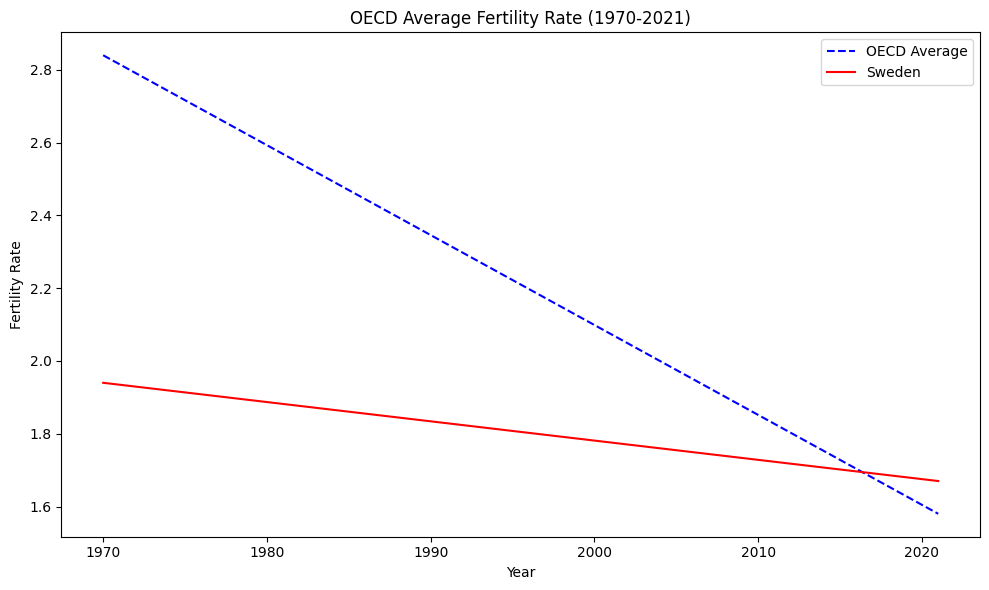

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

sweden_fertility = df_fertility.loc['Sweden', [
    '1970', '2021']].astype(float)


oecd_avg = [2.84, 1.58]


fig, ax = plt.subplots(figsize=(10, 6))

years = ["1970", "2021"]
years_all = list(map(int, years))
oecd_avg_all = list(map(float, oecd_avg))

ax.plot(years_all, oecd_avg_all, linestyle='--',
        color='blue', label='OECD Average')
ax.plot(years_all, sweden_fertility,
        linestyle='-', color='red', label='Sweden')


ax.set_xlabel('Year')
ax.set_ylabel('Fertility Rate')
ax.set_title('OECD Average Fertility Rate (1970-2021)')
ax.legend()

plt.tight_layout()
plt.show()

C:\Users\Delic\AppData\Local\Temp\ipykernel_11252\1347475638.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_fertility_sorted.index.astype(


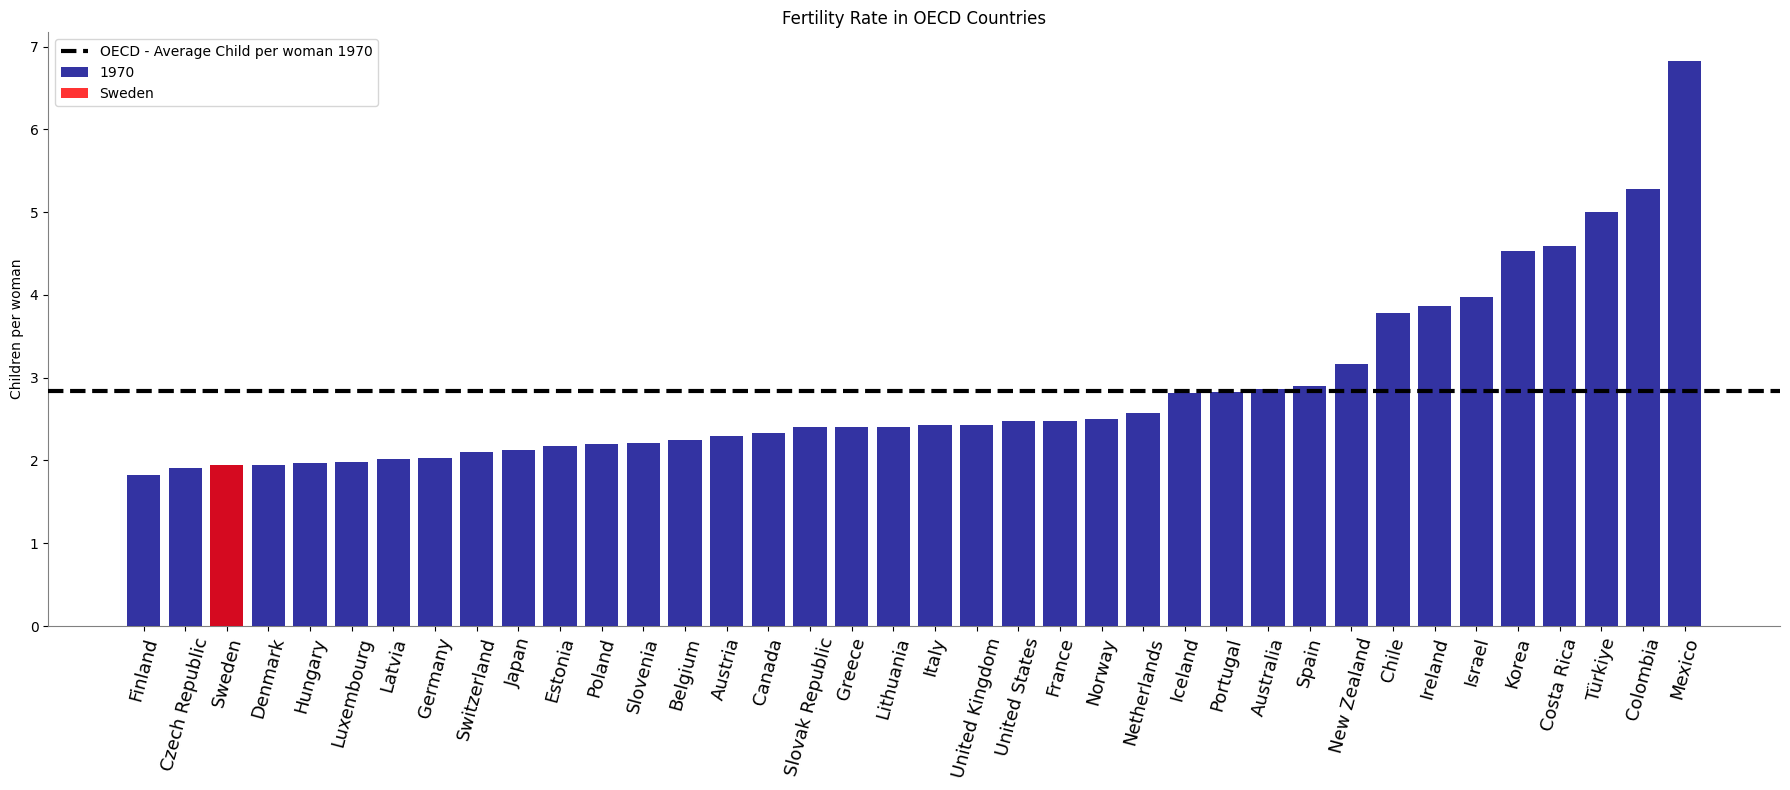

In [28]:
fig, ax = plt.subplots(figsize=(18, 8))


df_fertility_sorted = df_fertility[df_fertility.index !=
                                   "OECD average"].sort_values("1970", ascending=True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("grey")
ax.spines["bottom"].set_color("grey")


ax.bar(df_fertility_sorted.index.astype(str),
       df_fertility_sorted["1970"], color="darkblue", label="1970", alpha=0.8,  zorder=3)
ax.axhline(y=2.84, color="black", linewidth=3, linestyle="--",
           label="OECD - Average Child per woman 1970", zorder=5)
ax.bar("Sweden", df_fertility_sorted.loc["Sweden", "1970"],
       color="red", label="Sweden", alpha=0.8, zorder=4)


ax.set_ylabel("Children per woman")
ax.set_title("Fertility Rate in OECD Countries")
ax.set_xticklabels(df_fertility_sorted.index.astype(
    str), rotation=75, fontsize=13)

ax.legend()

plt.tight_layout()
plt.show()

C:\Users\Delic\AppData\Local\Temp\ipykernel_11252\1125312264.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_fertility_sorted.index.astype(


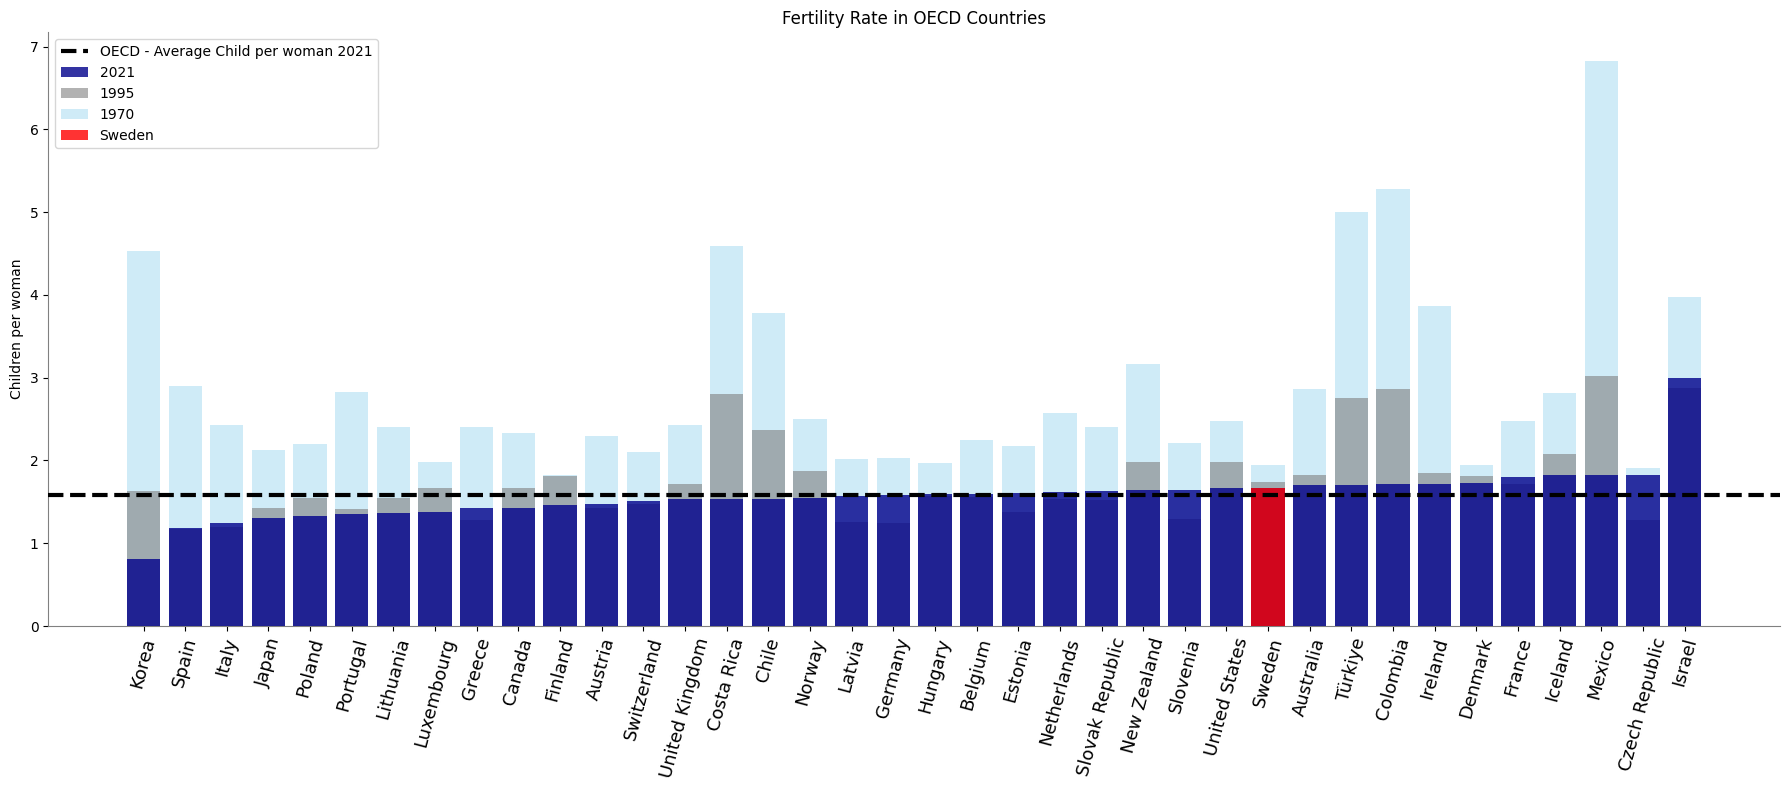

In [29]:
fig, ax = plt.subplots(figsize=(18, 8))


df_fertility_sorted = df_fertility[df_fertility.index !="OECD average"].sort_values("2021", ascending=True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("grey")
ax.spines["bottom"].set_color("grey")


ax.bar(df_fertility_sorted.index.astype(str),
       df_fertility_sorted["2021"], color="darkblue", label="2021", alpha=0.8,  zorder=3)

ax.bar(df_fertility_sorted.index.astype(str),
       df_fertility_sorted["1995"], color="grey", label="1995", alpha=0.6, zorder=2)
ax.bar(df_fertility_sorted.index.astype(str),
       df_fertility_sorted["1970"], color="skyblue", label="1970", alpha=0.4, zorder=1)
ax.bar("Sweden", df_fertility_sorted.loc["Sweden", "2021"],
       color="red", label="Sweden", alpha=0.8, zorder=4)



ax.axhline(y=1.58, color="black", linewidth=3, linestyle="--",
           label="OECD - Average Child per woman 2021", zorder=5)

ax.set_ylabel("Children per woman")
ax.set_title("Fertility Rate in OECD Countries")
ax.set_xticklabels(df_fertility_sorted.index.astype(
    str), rotation=75, fontsize=13)

ax.legend()

plt.tight_layout()  
plt.show()

In [22]:
df_public_spending = pd.read_excel("Data/1.1_OECD_public_spending_family.xlsx",
                             usecols="L,M,N, O, P",
                             skiprows=3, nrows=40)

df_public_spending = df_public_spending.rename(columns={
    df_public_spending.columns[0]: "Country",
    df_public_spending.columns[1]: "Total",
    df_public_spending.columns[2]: "Cash",
    df_public_spending.columns[3]: "Public_services",
    df_public_spending.columns[4]: "Taxbreaks"
})

df_public_spending.set_index("Country", inplace=True)

df_public_spending.head(40)

,Total,Cash,Public_services,Taxbreaks
Country,,,,
France,3.439601,1.335785,1.376677,0.727139
Sweden,3.420961,1.290414,2.130547,0.000000
Luxembourg,3.363303,2.304185,1.059118,0.000000
Poland,3.348486,2.299683,0.719831,0.328973
Estonia,3.342940,2.316032,0.893772,0.133136
Iceland,3.342760,1.026121,2.316639,0.000000
Denmark,3.313367,1.268997,2.044370,0.000000
Norway,3.276841,1.224974,1.962067,0.089800
Germany,3.240882,1.075665,1.344086,0.821131


C:\Users\Delic\AppData\Local\Temp\ipykernel_11252\270856998.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_public_spending_sorted.index.astype(


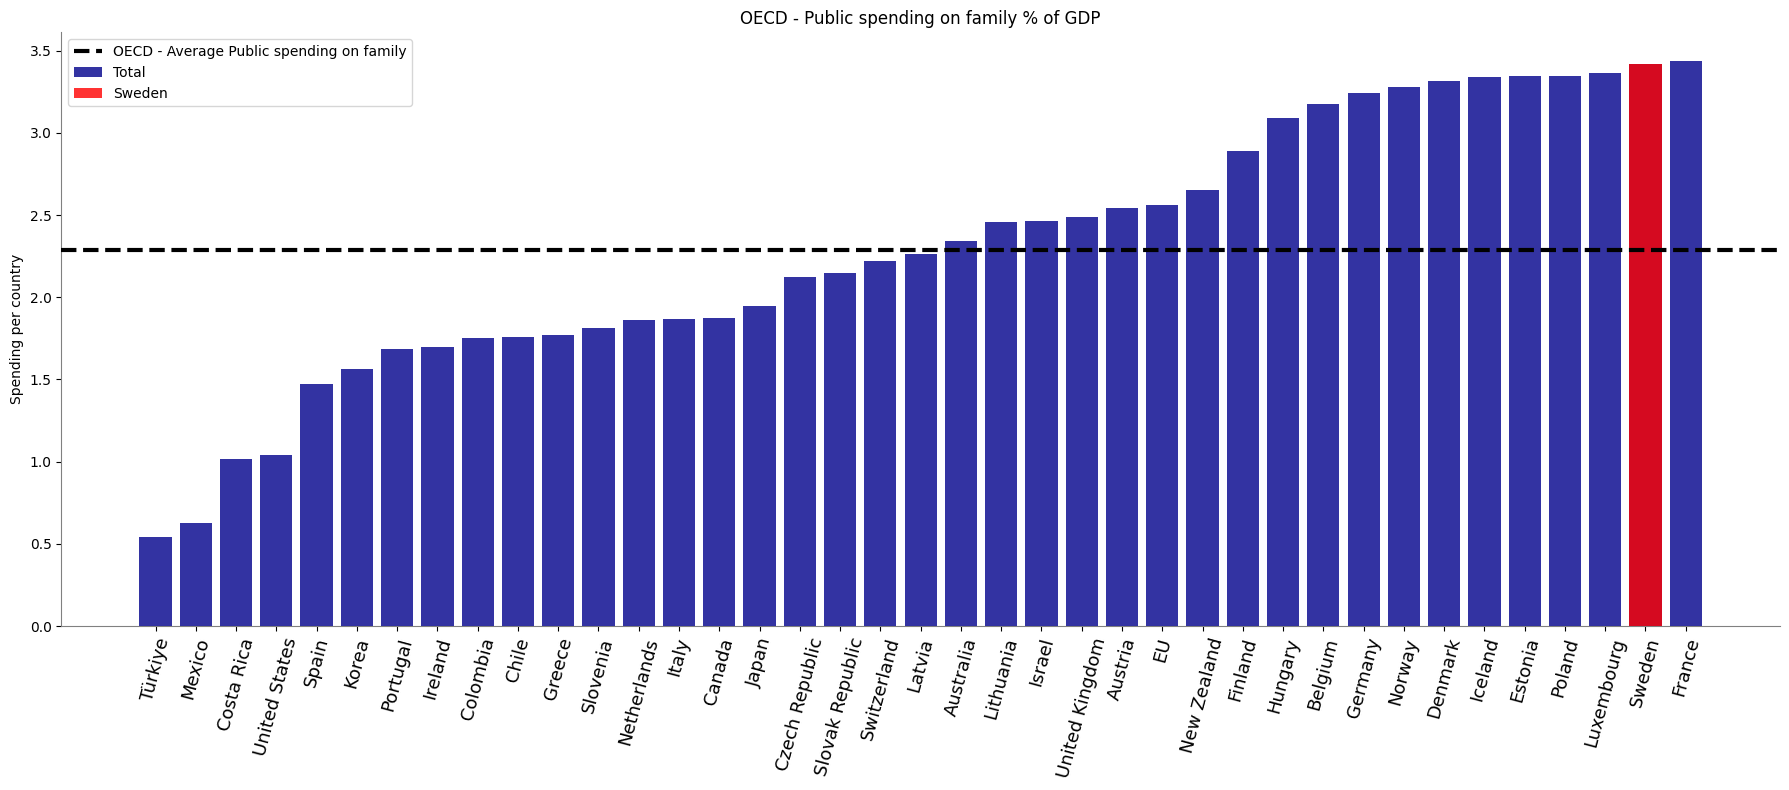

In [37]:
fig, ax = plt.subplots(figsize=(18, 8))


df_public_spending_sorted = df_public_spending[df_public_spending.index !=
                                   "OECD"].sort_values("Total", ascending=True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("grey")
ax.spines["bottom"].set_color("grey")


ax.bar(df_public_spending_sorted.index.astype(str),
       df_public_spending_sorted["Total"], color="darkblue", label="Total", alpha=0.8,  zorder=3),

ax.bar("Sweden", df_public_spending_sorted.loc["Sweden", "Total"],
       color="red", label="Sweden", alpha=0.8, zorder=4)



ax.axhline(y=2.29, color="black", linewidth=3, linestyle="--",
           label="OECD - Average Public spending on family", zorder=5)

ax.set_ylabel("Spending per country")
ax.set_title("OECD - Public spending on family % of GDP")
ax.set_xticklabels(df_public_spending_sorted.index.astype(
    str), rotation=75, fontsize=13)

ax.legend()

plt.tight_layout()
plt.show()

C:\Users\Delic\AppData\Local\Temp\ipykernel_11252\2713804502.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_5_spenders.index.astype(str), rotation=75, fontsize=13)


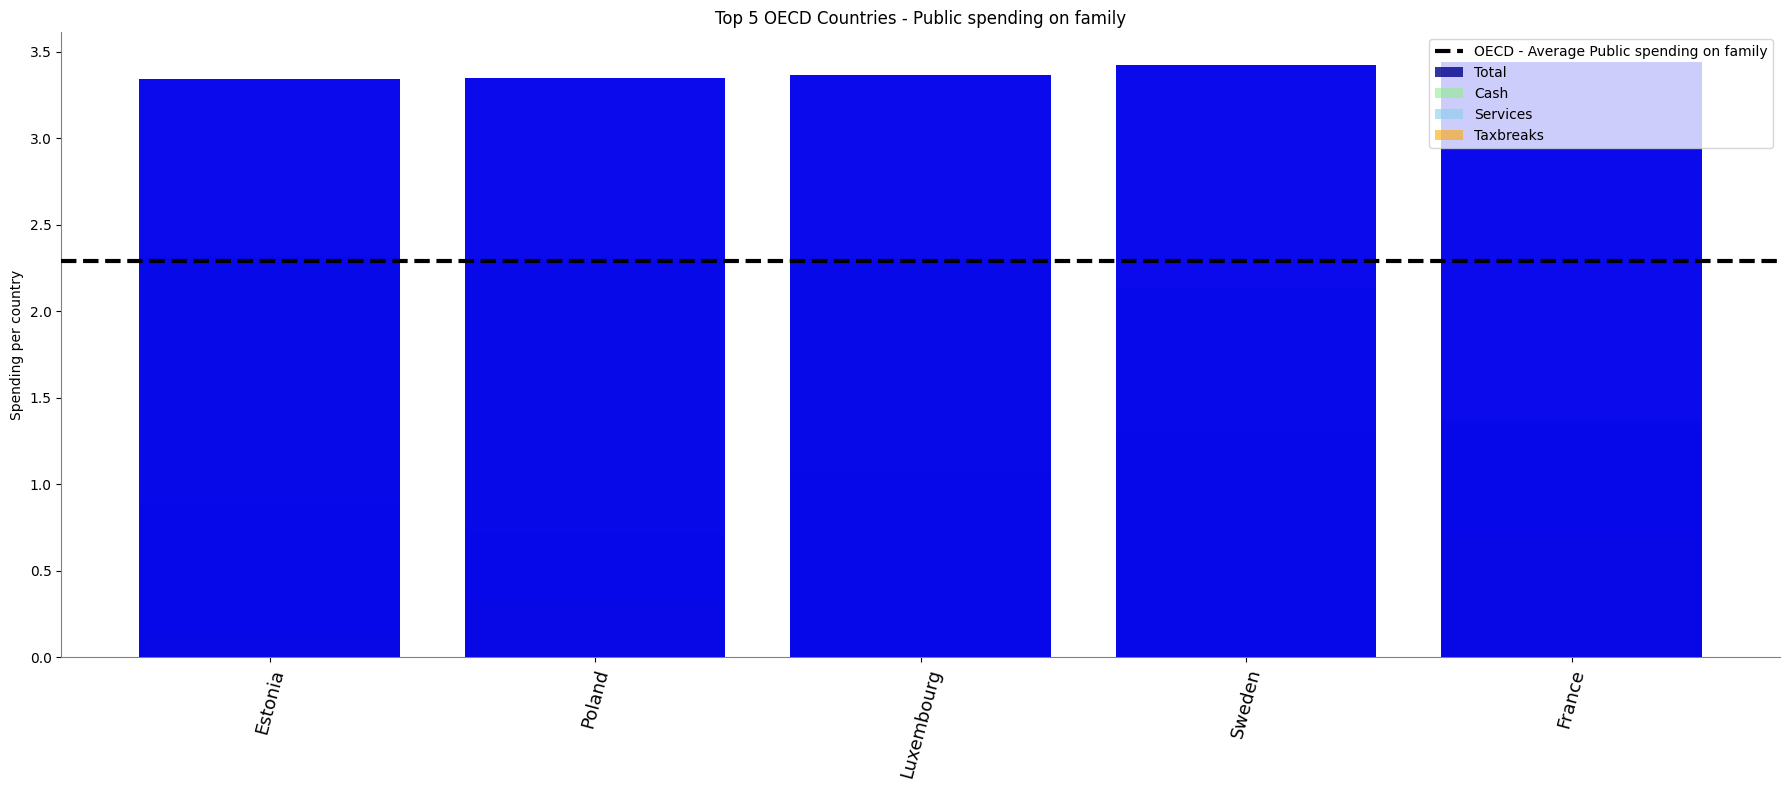

In [55]:

df_public_spending_sorted = df_public_spending[df_public_spending.index != "OECD average"].sort_values(
    "Total", ascending=True)

top_10_spenders = df_public_spending_sorted.tail(10)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=top_10_spenders.index,
    y=top_10_spenders["Public_services"],
    name='Services',
    marker_color='Darkblue'
))

fig.add_trace(go.Bar(
    x=top_10_spenders.index,
    y=top_10_spenders["Cash"],
    name='Cash',
    marker_color='blue',
    base=top_10_spenders["Public_services"]
))

fig.add_trace(go.Bar(
    x=top_10_spenders.index,
    y=top_10_spenders["Taxbreaks"],
    name='Taxbreaks',
    marker_color='Purple',
    base=top_10_spenders["Public_services"] + top_10_spenders["Cash"]
))


fig.update_layout(
    title="Top 10 OECD Countries - Public spending on family in % of GDP",
    xaxis_title="Country",
    yaxis_title="Spending per country",
    xaxis=dict(tickangle=75, tickfont=dict(size=13)),
    barmode='relative',
)

# Displaying the plot
fig.show()

In [56]:

df_public_spending_sorted = df_public_spending[df_public_spending.index != "OECD average"].sort_values(
    "Total", ascending=True)

Bottom_10_spenders = df_public_spending_sorted.head(10)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=Bottom_10_spenders.index,
    y=Bottom_10_spenders["Public_services"],
    name='Services',
    marker_color='Darkblue'
))

fig.add_trace(go.Bar(
    x=Bottom_10_spenders.index,
    y=Bottom_10_spenders["Cash"],
    name='Cash',
    marker_color='blue',
    base=Bottom_10_spenders["Public_services"]
))

fig.add_trace(go.Bar(
    x=Bottom_10_spenders.index,
    y=Bottom_10_spenders["Taxbreaks"],
    name='Taxbreaks',
    marker_color='Purple',
    base=Bottom_10_spenders["Public_services"] + Bottom_10_spenders["Cash"]
))


fig.update_layout(
    title="Bottom 10 OECD Countries - Public spending on family in % of GDP",
    xaxis_title="Country",
    yaxis_title="Spending per country",
    xaxis=dict(tickangle=75, tickfont=dict(size=13)),
    barmode='relative',
)

# Displaying the plot
fig.show()